# Spaceship Titanic

## Loading the data

In [102]:
import numpy as np
import pandas as pd

In [103]:
train = pd.read_csv("~/DataspellProjects/dsProject/Kaggle-competitions/Spaceship Titanic/data/train.csv")
test = pd.read_csv("~/DataspellProjects/dsProject/Kaggle-competitions/Spaceship Titanic/data/test.csv")

In [104]:
train.head(n=5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [105]:
test.head(n=5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [107]:
# Numerical columns
num_cols = [
    "Age",
    "RoomService",
    "FoodCourt",
    "ShoppingMall",
    "Spa",
    "VRDeck",
]

# Categorical columns
cat_cols = [
    "HomePlanet",
    "CryoSleep",
    "Destination",
    "VIP",
]

# Qualitative columns
qual_cols = [
    "PassengerId",
    "Cabin",
    "Name",
]

feature_cols = num_cols + cat_cols + qual_cols
target_col = "Transported"

## EDA (Exploratory Data Analysis)

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

### Target distribution

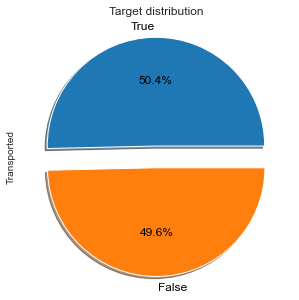

In [109]:
plt.figure(figsize=(5, 5))
train[target_col].value_counts().plot.pie(explode=[0.1, 0.1], autopct="%1.1f%%", shadow=True,
textprops={"fontsize": 12, "color": "black"}).set_title("Target distribution");

From the plot above we can see that the target variable is highly balanced.

### Numerical features analysis

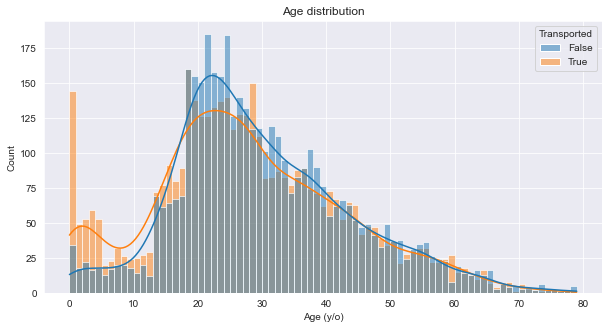

In [110]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train, x="Age", hue=target_col, binwidth=1, kde=True)
plt.title("Age distribution")
plt.xlabel("Age (y/o)");

+ 0-18 y/o passengers more likely to be transported than not.
+ 18-25 y/o passengers less likely to be transported than not.
+ Over 25 y/o people are about equally likely to be transported than not.

Let's create new features that will divide our passangers into age groups. But before this we should analyze features where passengers have spent some money. These features are: `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`.

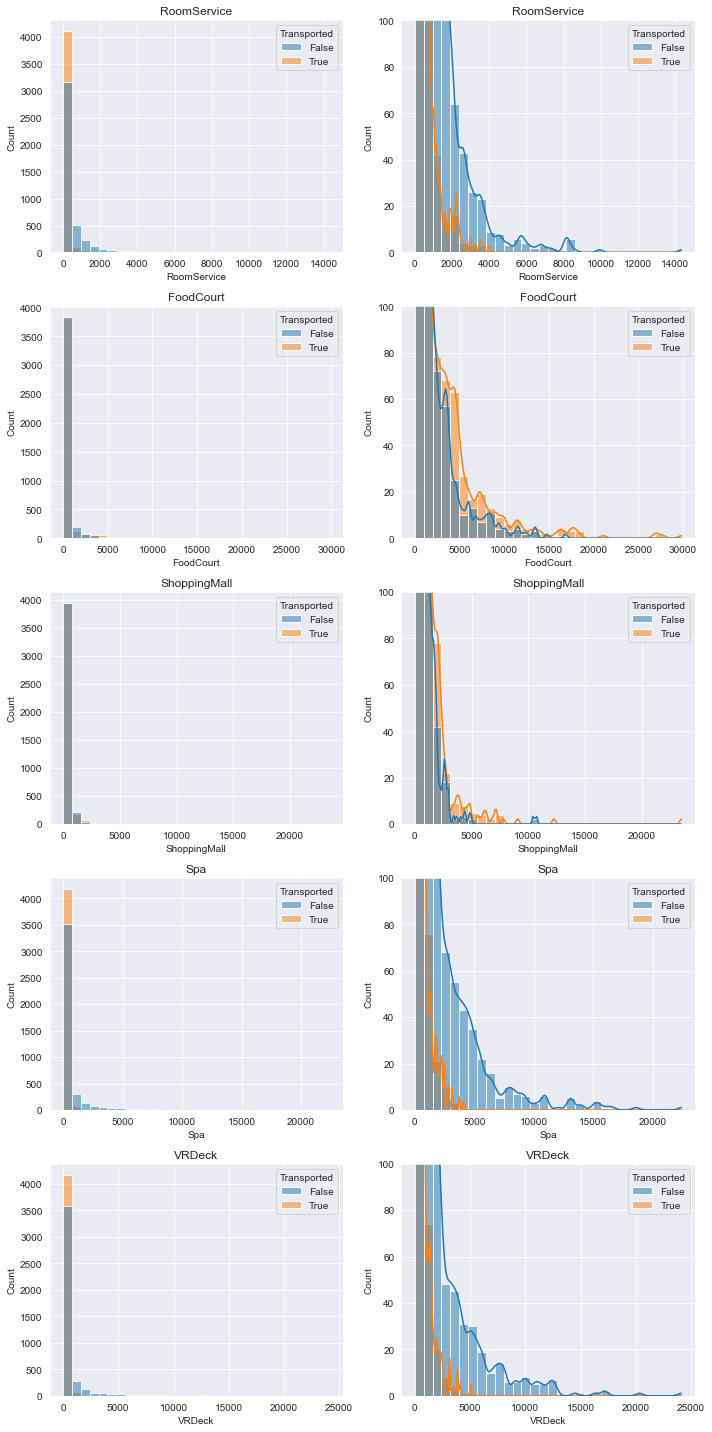

In [111]:
amenities = num_cols[1:]

fig = plt.figure(figsize=(10, 20))
for i, var_name in enumerate(amenities):
    # Left plot
    ax = fig.add_subplot(5, 2, 2 * i + 1)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=False, hue=target_col)
    ax.set_title(var_name)

    # Right plot
    ax = fig.add_subplot(5, 2, 2 * i + 2)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=True, hue=target_col)
    plt.ylim([0, 100])
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

**Conclusions**:
+ The distribution of spending decays *exponentially* (compare exponential plot below and right plots).


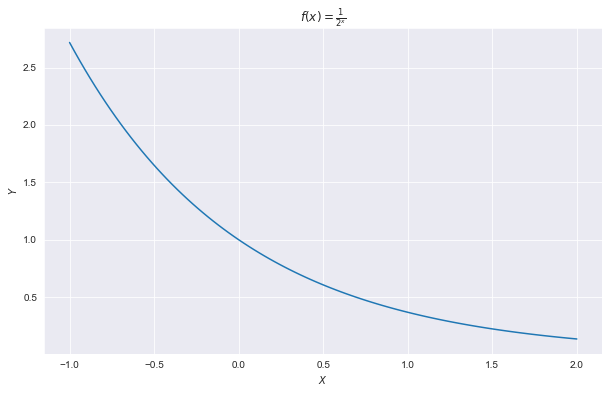

In [112]:
x = np.linspace(-1, 2, 100)
y = 1 / np.exp(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title(r"$f(x) = \frac{1}{2^x}$")
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.show()

+ There are a small number of outliers.
+ Passengers who were transported tended to spent less.
+ `RoomService`, `Spa` and `VRDeck` (first group) have different distributions to `FoodCourt` and `ShoppingMall` (second group). Therefore, we can assume that first group could be interpreted as **luxury amenities**, and second group as **essential amenities**.

**To do**:
+ Create a new feature that tracks total expenditure across all 5 features.
+ Create a binary feature that indicates if the person has any expenditures. That is person with no expenditures has 0.
+ Take the log transform to reduce skew.

### Categorical features analysis

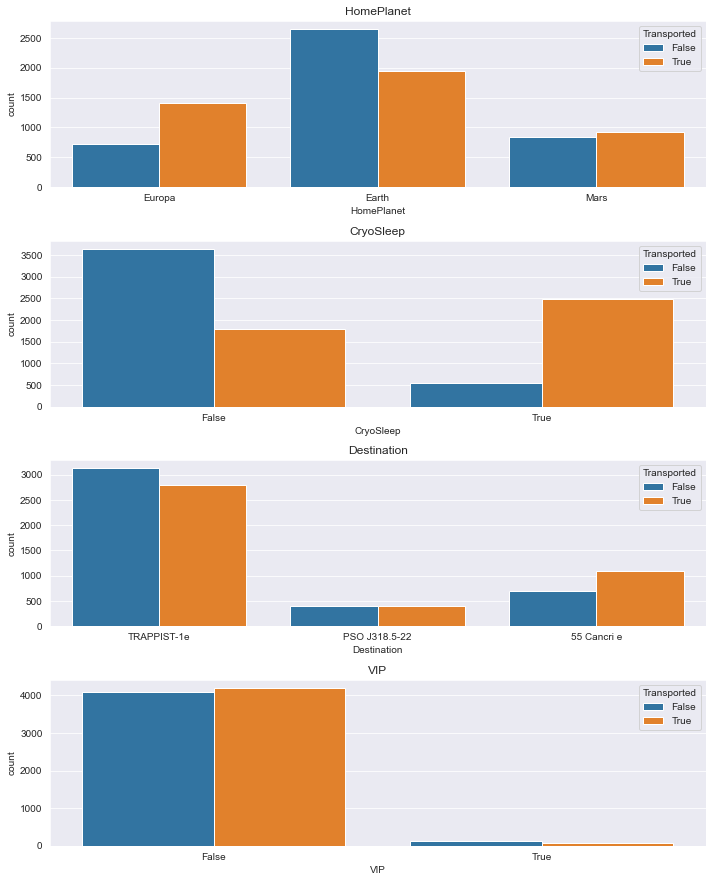

In [113]:
fig = plt.figure(figsize=(10, 15))

for i, var_name in enumerate(cat_cols):
    ax = fig.add_subplot(5, 1, i + 1)
    sns.countplot(data=train, x=var_name, axes=ax, hue=target_col)
    ax.set_title(var_name)

fig.tight_layout()
plt.show()

**Conclusions**:
+ `HomePlanet`. From Europa twice as many passengers were transported than were not. From Earth more people weren't transported. From Mars people were equally transported and weren't, same as from Unknown planet.
+ `CryoSleep` seems to be very useful feature. Cryosleep significantly increase the chance to be transported.
+ `Destination`. Types of destinations seems to be balanced according to `Transported` feature. I don't think it shall make any large impact.
+ `VIP`. Passengers who had not VIP equally likely to be transported and not to be transported. Nevertheless, people with VIP are in the same situation. I tnink we shall drop this column to prevent overfitting.

**To do**:
+ Drop `VIP` column to prevent overfitting.

### Qualitative features analysis

Before any visualization we need to transform qualitative features.

In [114]:
train[qual_cols].head(n=5)

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines


**Conclusions**:
+ `PassengerId` takes the form *gggg_pp* where *gggg* indicates a group the passenger is travelling with an *pp* is their number within the group.
+ `Cabin` takes the form *deck/num/side*, where *side* can be either *P* for *Port* or *S* for *Starboard*.

**To do**:
+ Extract the group and group size from the `PassengerId` feature.
+ Extract the deck, number and side from `Cabin` feature.
+ Extract surname from the `Name` feature to identify family.

## Feature engineering

### Numerical features engineering

Let's split `Age` feature into groups.

In [115]:
train["Age_group"] = np.nan
train.loc[train["Age"] < 18, "Age_group"] = "Age_0-17"
train.loc[(train["Age"] > 17) & (train["Age"] <= 25), "Age_group"] = "Age_18-25"
train.loc[(train["Age"]) > 25, "Age_group"] = "Age_25+"

test["Age_group"] = np.nan
test.loc[test["Age"] < 18, "Age_group"] = "Age_0-17"
test.loc[(test["Age"] > 17) & (test["Age"] <= 25), "Age_group"] = "Age_18-25"
test.loc[(test["Age"]) > 25, "Age_group"] = "Age_25+"

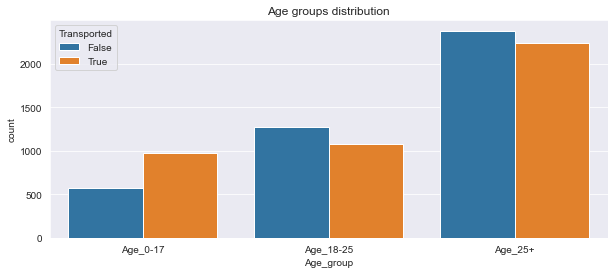

In [116]:
age_order = ["Age_0-17", "Age_18-25", "Age_25+"]

plt.figure(figsize=(10, 4))

sns.countplot(data=train, x="Age_group", hue=target_col, order=age_order)
plt.title("Age groups distribution");

Let's calculate total expenditure and identify passengers with no expenditure.


In [117]:
train["Expenditure"] = train[amenities].sum(axis=1)
train["No_spending"] = (train["Expenditure"] == 0).astype(int)

test["Expenditure"] = test[amenities].sum(axis=1)
test["No_spending"] = (test["Expenditure"] == 0).astype(int)

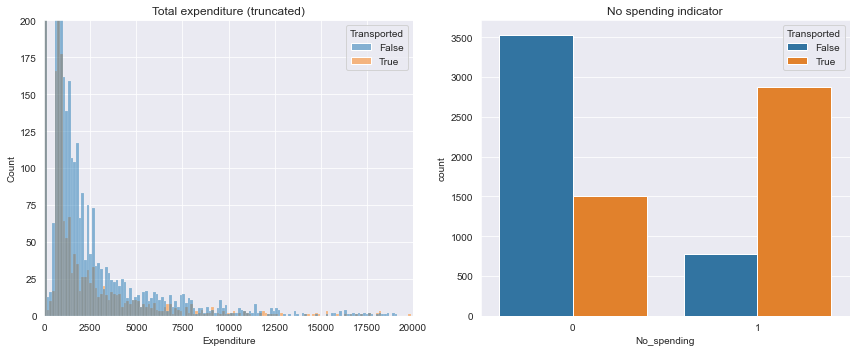

In [118]:
fig = plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=train, x="Expenditure", hue=target_col, bins=250)
plt.title("Total expenditure (truncated)")
plt.ylim([0, 200])
plt.xlim([0, 20000])

plt.subplot(1, 2, 2)
sns.countplot(data=train, x="No_spending", hue=target_col)
plt.title("No spending indicator")
fig.tight_layout()

**Reminder**: take the log transform to reduce skew!

### Categorical features engineering

**Reminder**: drop the `VIP` column.

### Qualitative features engineering

Extract passenger group and group size from `PassengerId`.

In [119]:
train["Group"] = train["PassengerId"].apply(lambda x: x.split("_")[0]).astype(int)
test["Group"] = test["PassengerId"].apply(lambda x: x.split("_")[0]).astype(int)

train["Group_size"] = train["Group"].map(lambda x: pd.concat([train["Group"], test["Group"]]).value_counts()[x])  # Test later without pd.concat()
test["Group_size"] = test["Group"].map(lambda x: pd.concat([train["Group"], test["Group"]]).value_counts()[x])

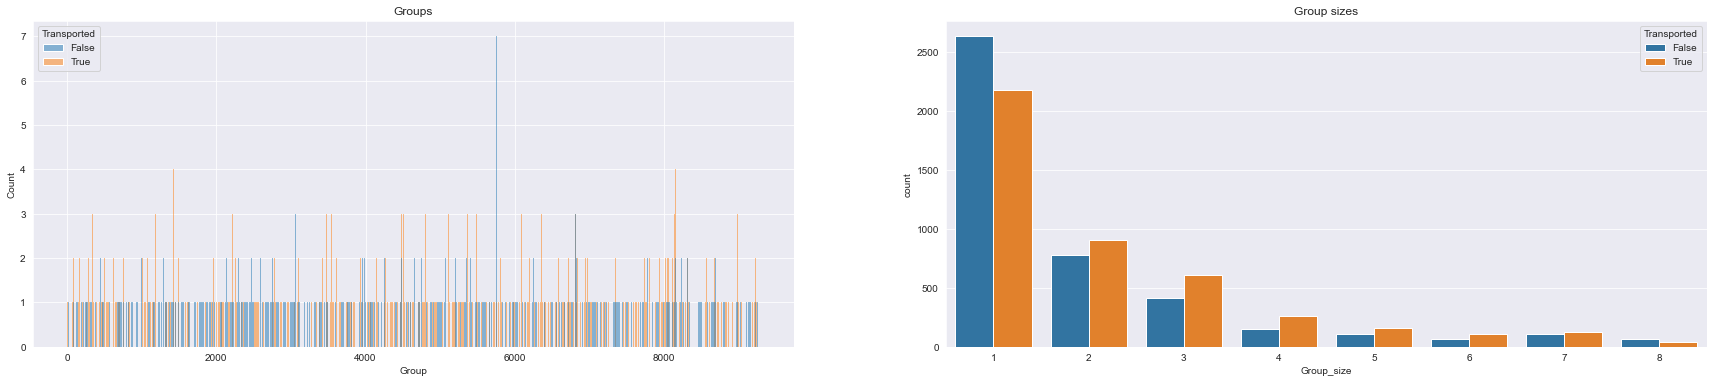

In [120]:
plt.figure(figsize=(30, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=train, x="Group", hue=target_col, binwidth=1)
plt.title("Groups")

plt.subplot(1, 2, 2)
sns.countplot(data=train, x="Group_size", hue=target_col)
plt.title("Group sizes");

In [121]:
print("Cardinality of Group features is", len(pd.unique(train["Group"])))

Cardinality of Group features is 6217


We cannot use the `Group` feature in our model because it has too big of a cardinality, and would explode the number of dimensions with one-hot encoding.
The `Group_size` feature should be useful. According to the right plot we can say that alone passengers less likely to be transported. Therefore let's create a new binary `Solo` feature that tracks whether someone is travelling on their own or not.

In [122]:
train["Solo"] = (train["Group_size"] == 1).astype(int)
test["Solo"] = (test["Group_size"] == 1).astype(int)

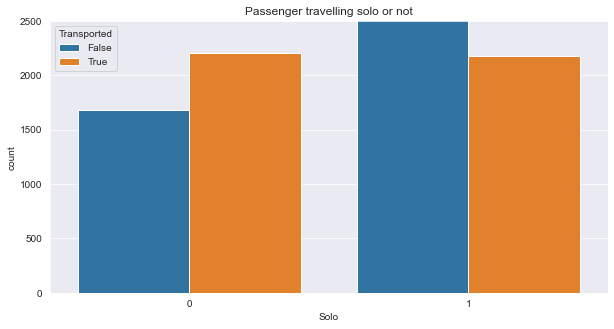

In [123]:
plt.figure(figsize=(10, 5))

sns.countplot(data=train, x="Solo", hue=target_col)
plt.title("Passenger travelling solo or not")
plt.ylim([0, 2500]);

Let's extract deck, number and side from `Cabin` feature.

In [124]:
train["Cabin"].head(n=5)

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

In [125]:
# Replacing NaN's with outliers for now (so we can split feature)
train["Cabin"].fillna("Z/999/Z", inplace=True)
test["Cabin"].fillna("Z/999/Z", inplace=True)

train["Cabin_deck"] = train["Cabin"].apply(lambda x: x.split("/")[0])
train["Cabin_number"] = train["Cabin"].apply(lambda x: x.split("/")[1]).astype(int)
train["Cabin_side"] = train["Cabin"].apply(lambda x: x.split("/")[2])

test["Cabin_deck"] = test["Cabin"].apply(lambda x: x.split("/")[0])
test["Cabin_number"] = test["Cabin"].apply(lambda x: x.split("/")[1]).astype(int)
test["Cabin_side"] = test["Cabin"].apply(lambda x: x.split("/")[2])